In [1]:
#Dependencies
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Read Data
EDU = pd.read_csv("EDU.csv", date_parser=True)
EDU

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,31.280001,32.029999,31.240000,31.600000,31.426054,1930900
1,2015-12-08,31.770000,32.430000,31.510000,32.320000,32.142090,1652700
2,2015-12-09,32.270000,32.560001,31.700001,31.920000,31.744293,1498500
3,2015-12-10,32.090000,32.380001,31.650000,32.150002,31.973028,1419800
4,2015-12-11,31.889999,32.130001,31.580000,31.930000,31.754238,1468400
...,...,...,...,...,...,...,...
1254,2020-11-30,168.550003,168.889999,164.300003,164.850006,164.850006,1984200
1255,2020-12-01,165.320007,165.759995,161.110001,161.770004,161.770004,1393900
1256,2020-12-02,161.729996,161.789993,156.509995,157.960007,157.960007,1295000
1257,2020-12-03,159.000000,163.179993,158.850006,162.089996,162.089996,1340600


In [3]:
#Change paramters
cut_off_date = "2019-1-1"
x_train_days = 150
num_epochs = 50
num_batch = 32
data_dim = 1
units1=50
units2=50

In [4]:
#Create Training Set based of date selected
EDU_train_ = EDU[EDU["Date"]<cut_off_date].copy()

In [5]:
#Create testing set
EDU_test = EDU[EDU["Date"]>cut_off_date].copy()
EDU_test

,Date,Open,High,Low,Close,Adj Close,Volume
960,2019-10-01,110.790001,111.730003,108.779999,111.220001,111.220001,520400
961,2019-10-02,110.580002,111.160004,108.430000,110.389999,110.389999,779800
962,2019-10-03,109.239998,113.120003,107.769997,112.910004,112.910004,1162900
963,2019-10-04,112.209999,114.139999,111.769997,114.070000,114.070000,572600
964,2019-10-07,114.080002,114.919998,112.440002,114.250000,114.250000,623600
...,...,...,...,...,...,...,...
1254,2020-11-30,168.550003,168.889999,164.300003,164.850006,164.850006,1984200
1255,2020-12-01,165.320007,165.759995,161.110001,161.770004,161.770004,1393900
1256,2020-12-02,161.729996,161.789993,156.509995,157.960007,157.960007,1295000
1257,2020-12-03,159.000000,163.179993,158.850006,162.089996,162.089996,1340600


In [6]:
#Delete Unnessary Columns
train_EDU=EDU_train_.drop(["Adj Close","Volume","High", "Low", "Close"], axis = 1)
train_EDU.to_csv("EDU_Train_Data.csv")
train_EDU=train_EDU.drop("Date",axis = 1)

In [7]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
EDU_train = scalar.fit_transform(train_EDU)
EDU_train

array([[4.17585088e-02],
       [4.74422926e-02],
       [5.32420839e-02],
       [5.11541590e-02],
       [4.88342309e-02],
       [4.74422926e-02],
       [5.38220630e-02],
       [6.17097792e-02],
       [6.31017175e-02],
       [5.62579638e-02],
       [6.27537416e-02],
       [6.10137926e-02],
       [5.77659211e-02],
       [5.66059744e-02],
       [5.67219587e-02],
       [5.98538460e-02],
       [5.30100923e-02],
       [4.52383719e-02],
       [3.60747133e-02],
       [2.40111359e-02],
       [1.36875190e-02],
       [1.11355876e-02],
       [4.63971702e-04],
       [0.00000000e+00],
       [5.45180380e-03],
       [1.12515951e-02],
       [6.72775788e-03],
       [4.52383719e-03],
       [2.69110315e-02],
       [1.07876234e-02],
       [1.31075167e-02],
       [1.73993738e-02],
       [2.30831693e-02],
       [2.02992695e-02],
       [2.48231067e-02],
       [3.36387894e-02],
       [3.27108228e-02],
       [4.31504471e-02],
       [4.91822300e-02],
       [5.45180496e-02],


In [8]:
X_train = []
y_train = []

In [9]:
# Number of days of training data into X train and rest of data into Y train
X_train = []
y_train = []
for i in range (x_train_days,EDU_train.shape[0]):
    X_train.append(EDU_train[i-x_train_days:i])
    y_train.append(EDU_train[i, 0])

In [10]:
#Create Arrays and show shape
X_train, y_train  = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((810, 150, 1), (810,))

In [11]:
#Create Model
model = Sequential()

model.add(LSTM(units=units1, activation="relu", return_sequences= True, input_shape=(X_train.shape[1],data_dim)))
model.add(Dropout(0.1))

model.add(LSTM(units=units2, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1))

In [12]:
#Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 150, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [14]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=num_batch)

Train on 810 samples
Epoch 1/50
810/810 [==============================] - 24s 29ms/sample - loss: 0.1556
Epoch 2/50
810/810 [==============================] - 20s 25ms/sample - loss: 0.0110
Epoch 3/50
810/810 [==============================] - 35s 44ms/sample - loss: 0.0071
Epoch 4/50
810/810 [==============================] - 30s 37ms/sample - loss: 0.0063
Epoch 5/50
810/810 [==============================] - 55s 68ms/sample - loss: 0.0058
Epoch 6/50
810/810 [==============================] - 99s 122ms/sample - loss: 0.0055
Epoch 7/50
810/810 [==============================] - 82s 101ms/sample - loss: 0.0053
Epoch 8/50
810/810 [==============================] - 64s 78ms/sample - loss: 0.0049
Epoch 9/50
810/810 [==============================] - 37s 46ms/sample - loss: 0.0049
Epoch 10/50
810/810 [==============================] - 37s 46ms/sample - loss: 0.0051
Epoch 11/50
810/810 [==============================] - 42s 52ms/sample - loss: 0.0053
Epoch 12/50
810/810 [===================

In [15]:
#Add training data to test data
past_days = train_EDU.tail(x_train_days)

In [16]:
EDU_predict = past_days.append(EDU_test, ignore_index = True)

In [17]:
EDU_predict

,Open,Date,High,Low,Close,Adj Close,Volume
0,82.860001,NaN,NaN,NaN,NaN,NaN,NaN
1,81.889999,NaN,NaN,NaN,NaN,NaN,NaN
2,82.330002,NaN,NaN,NaN,NaN,NaN,NaN
3,83.110001,NaN,NaN,NaN,NaN,NaN,NaN
4,82.580002,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
444,168.550003,2020-11-30,168.889999,164.300003,164.850006,164.850006,1984200.0
445,165.320007,2020-12-01,165.759995,161.110001,161.770004,161.770004,1393900.0
446,161.729996,2020-12-02,161.789993,156.509995,157.960007,157.960007,1295000.0
447,159.000000,2020-12-03,163.179993,158.850006,162.089996,162.089996,1340600.0


In [18]:
EDU_predict=EDU_predict.drop(["Adj Close","Volume","High", "Low", "Close"], axis =1)

In [19]:
#Drop unnessary rows
EDU_predict.to_csv("EDU_Input_Data.csv")
EDU_predict=EDU_predict.drop("Date", axis = 1)

In [20]:
#Transform data
inputs = scalar.transform(EDU_predict)

In [21]:
#Create X_test data with number of days and the rest into Y test
X_test = []
y_test = []

for i in range(x_train_days, inputs.shape[0]):
    X_test.append(inputs[i-x_train_days:i])
    y_test.append(inputs[i, 0])

In [22]:
#Show shape
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((299, 150, 1), (299,))

In [23]:
#make predictions
predictions=model.predict(X_test)

In [24]:
real_predictions = scalar.inverse_transform(predictions)
EDU_test['Date']= pd.to_datetime(EDU_test['Date'])

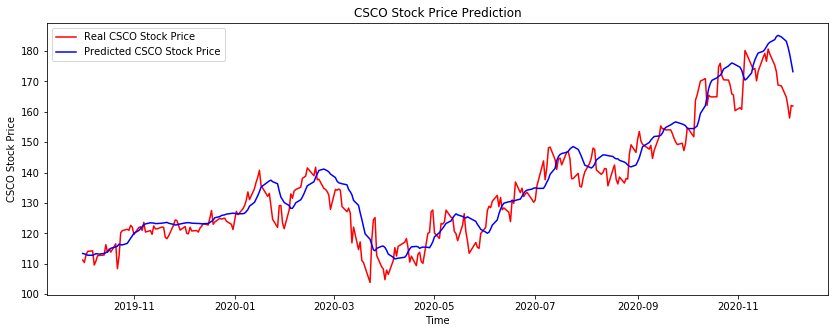

In [25]:
plt.figure(figsize=(14,5))
plt.plot(EDU_test["Date"],EDU_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(EDU_test["Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Unadjusted')

In [26]:
EDU_test

,Date,Open,High,Low,Close,Adj Close,Volume
960,2019-10-01,110.790001,111.730003,108.779999,111.220001,111.220001,520400
961,2019-10-02,110.580002,111.160004,108.430000,110.389999,110.389999,779800
962,2019-10-03,109.239998,113.120003,107.769997,112.910004,112.910004,1162900
963,2019-10-04,112.209999,114.139999,111.769997,114.070000,114.070000,572600
964,2019-10-07,114.080002,114.919998,112.440002,114.250000,114.250000,623600
...,...,...,...,...,...,...,...
1254,2020-11-30,168.550003,168.889999,164.300003,164.850006,164.850006,1984200
1255,2020-12-01,165.320007,165.759995,161.110001,161.770004,161.770004,1393900
1256,2020-12-02,161.729996,161.789993,156.509995,157.960007,157.960007,1295000
1257,2020-12-03,159.000000,163.179993,158.850006,162.089996,162.089996,1340600


In [27]:
import datetime
adjustment = datetime.timedelta(days=7)
EDU_test['Date']= pd.to_datetime(EDU_test['Date'])
EDU_test["Adj_Date"] = EDU_test["Date"]- adjustment

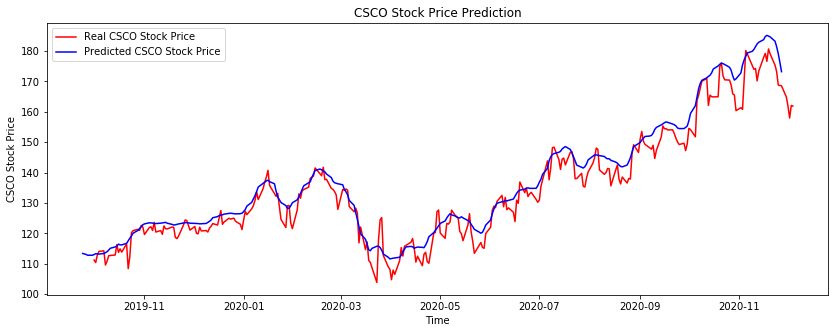

In [28]:
plt.figure(figsize=(14,5))
plt.plot(EDU_test["Date"],EDU_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(EDU_test["Adj_Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Adjusted')

In [29]:
EDU_data_= EDU_test.copy()

In [30]:
EDU_data=EDU_data_.drop(["Open","High","Low", "Adj Close","Volume"], axis = 1) 

In [31]:
EDU_data["Predicted_Close"]= real_predictions

In [32]:
EDU_data.to_csv("EDU_Predicted.csv")

In [33]:
EDU_data

,Date,Close,Adj_Date,Predicted_Close
960,2019-10-01,111.220001,2019-09-24,113.384697
961,2019-10-02,110.389999,2019-09-25,113.232346
962,2019-10-03,112.910004,2019-09-26,113.076416
963,2019-10-04,114.070000,2019-09-27,112.809418
964,2019-10-07,114.250000,2019-09-30,112.791931
...,...,...,...,...
1254,2020-11-30,164.850006,2020-11-23,183.226593
1255,2020-12-01,161.770004,2020-11-24,181.417557
1256,2020-12-02,157.960007,2020-11-25,179.102203
1257,2020-12-03,162.089996,2020-11-26,176.289078


In [80]:


future_data = EDU_data.tail(165)
future_list = future_data["Close"].to_list()
future_input = np.array(future_list)

In [81]:
#future_data = CSCO_data.tail(120)
#future_list = future_data["Close"].to_list()
#future_input = np.array(future_list)

In [82]:
#days_testing = 59
days_testing = 160

In [83]:
#input_data = CSCO_data.tail(days_testing)
#input_list = input_data["Predicted Close"].to_list()
#data_input = np.array(input_data)

In [84]:
input_data = EDU_data.tail(days_testing)
input_list = input_data["Close"].to_list()
data_input = np.array(input_data)

In [85]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
series = array(future_list)
# define generator
n_input = days_testing
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=25)
# define model
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_dim=n_input))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit_generator(generator, steps_per_epoch=3, epochs=250, verbose=0)
# make a one step prediction out of sample
x_future = array(input_list).reshape((1, n_input))
future_prediction = model2.predict(x_future, verbose=2)

In [86]:
prediction_arrays= []
for x in range(30):
    import numpy as np
    future_prediction = np.squeeze(future_prediction)
    x_future=np.squeeze(x_future)
    x_future= np.append(x_future, future_prediction)
    x_future=np.delete(x_future, 0)
    x_future=x_future.reshape((1, n_input))
    future_prediction = model2.predict(x_future, verbose=0)
    prediction_arrays.append(future_prediction)

In [87]:
#Create Date
prediction_dates = pd.bdate_range(start='2020-12-7', end='2020-12-18')
#prediction_dates = pd.bdate_range(start='2020-15-10', end='2020-15-10')
#prediction_dates = pd.bdate_range(start='2020-11-06', end='2020-12-07')
list_dates = []
for i in prediction_dates:
    list_dates.append(i.strftime('%Y-%m-%d'))

In [88]:
prediction_list = []
for i in range(10):
    values = prediction_arrays[i][0][0]
    prediction_list.append(values)

In [89]:
len(list_dates)

10

In [90]:
#Create DataFrame
list_ = prediction_list  
future_df = pd.DataFrame(list_, columns =['Future_Values']) 

In [91]:
future_df["Dates"]=list_dates
future_df["Dates"]= pd.to_datetime(future_df["Dates"])

In [92]:
future_df

,Future_Values,Dates
0,166.813461,2020-12-07
1,163.850739,2020-12-08
2,160.480484,2020-12-09
3,157.807816,2020-12-10
4,159.712784,2020-12-11
5,161.257523,2020-12-14
6,161.160675,2020-12-15
7,156.965500,2020-12-16
8,162.750351,2020-12-17
9,161.386703,2020-12-18


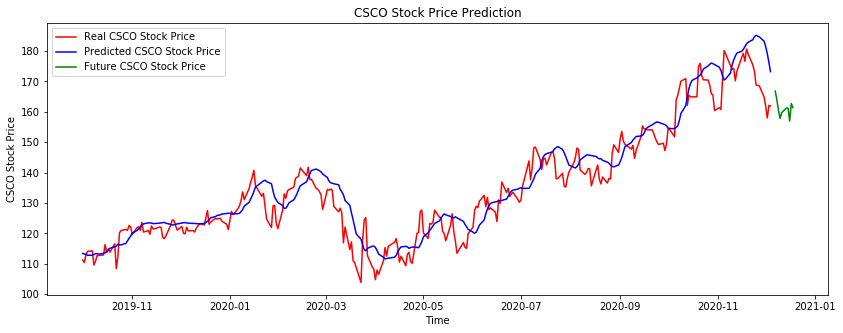

In [93]:
#Plot Values
plt.figure(figsize=(14,5))
plt.plot(EDU_test["Date"],EDU_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(EDU_test["Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.plot(future_df["Dates"],future_df["Future_Values"], color = 'green', label = 'Future CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('CSCO_Future_Prediction')

In [94]:
#Save DF
future_df.to_csv("EDU_Future_Data.csv")

In [49]:
pd.concat([future_df, CSCO_data])

NameError: name 'CSCO_data' is not defined